<a href="https://colab.research.google.com/github/jrohauer/ECGR4105/blob/main/HW3_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
 # Josh Rohauer
 # 8007098398
 # Homework 3


 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 from sklearn.preprocessing import MinMaxScaler
 from sklearn.preprocessing import StandardScaler
 import seaborn as sns
 sns.set()
 from sklearn.linear_model import LogisticRegression

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Problem 1
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/diabetes.csv'
diabetes = pd.read_csv(file_path)

diabetes_X = diabetes.loc[:, ~diabetes.columns.isin(['Outcome'])]
diabetes_Y = diabetes['Outcome'].values

np.random.seed(17)
diabetes_X_train, diabetes_X_test, diabetes_Y_train, diabetes_Y_test  = train_test_split(diabetes_X, diabetes_Y, train_size = 0.8, test_size = 0.2, random_state = 100)

#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
diabetes_X_train = scalerMM.fit_transform(diabetes_X_train)
diabetes_X_test = scalerMM.fit_transform(diabetes_X_test)
# df_train = scalerSS.fit_transform(df_train)
# df_test = scalerSS.fit_transform(df_test)

In [33]:

classifier = LogisticRegression(random_state=0)
classifier.fit(diabetes_X_train, diabetes_Y_train)

diabetes_Y_pred = classifier.predict(diabetes_X_test)

In [34]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(diabetes_Y_test, diabetes_Y_pred))
print("Precision:",metrics.precision_score(diabetes_Y_test, diabetes_Y_pred))
print("Recall:",metrics.recall_score(diabetes_Y_test, diabetes_Y_pred))
print("F1 Score:",metrics.f1_score(diabetes_Y_test, diabetes_Y_pred))
print("Coefficients: ")
classifier.coef_

Accuracy: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.4528301886792453
F1 Score: 0.5333333333333334
Coefficients: 


array([[ 1.18297028,  4.73342686, -0.46561869,  0.03511145,  0.13594228,
         3.16635675,  1.84020912,  1.08030704]])

Text(0.5, 427.9555555555555, 'Predicted label')

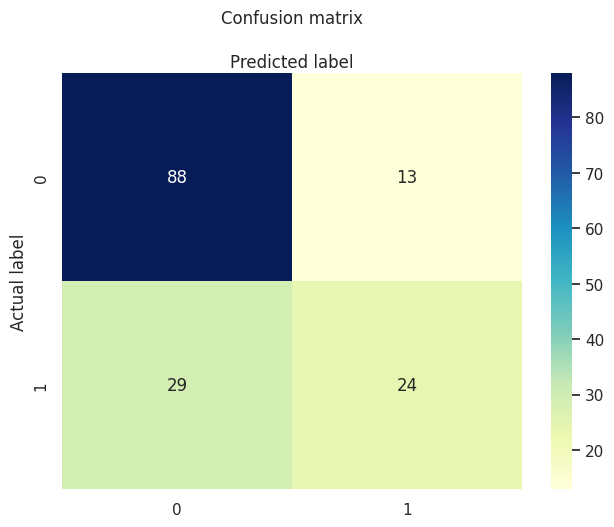

In [35]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(diabetes_Y_test, diabetes_Y_pred)
cnf_matrix


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [36]:

# Problem 2
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/cancer.csv'
cancer_dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'B': 0, 'M': 1})

cancer_dataset[varlist] = cancer_dataset[varlist].apply(binary_map)


cancer_X = cancer_dataset.loc[:, ~cancer_dataset.columns.isin(['id', 'diagnosis','Unnamed: 32'])]
cancer_Y = cancer_dataset['diagnosis'].values



np.random.seed(17)
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X,cancer_Y, train_size = 0.8, test_size = 0.2, random_state = 100)


In [37]:
#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
cancer_X_train = scalerMM.fit_transform(cancer_X_train)
cancer_X_test = scalerMM.fit_transform(cancer_X_test)
# df_train = scalerSS.fit_transform(df_train)
# df_test = scalerSS.fit_transform(df_test)

classifier = LogisticRegression(random_state=0)
classifier.fit(cancer_X_train, cancer_Y_train)

cancer_Y_pred = classifier.predict(cancer_X_test)

In [38]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(cancer_Y_test, cancer_Y_pred))
print("Precision:",metrics.precision_score(cancer_Y_test, cancer_Y_pred))
print("Recall:",metrics.recall_score(cancer_Y_test, cancer_Y_pred))
print("F1 Score:",metrics.f1_score(cancer_Y_test, cancer_Y_pred))
print("Coefficients: ")
print(classifier.coef_)

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(cancer_Y_test, cancer_Y_pred)
cnf_matrix

Accuracy: 0.9298245614035088
Precision: 1.0
Recall: 0.8367346938775511
F1 Score: 0.9111111111111111
Coefficients: 
[[ 1.51404437  1.63238771  1.49053823  1.28652592  0.75363465  0.38915706
   1.36160684  1.95643537  0.63908452 -0.84592426  1.1602516   0.3499843
   0.90385172  0.7594199   0.23380182 -0.53593815 -0.19028813  0.58331048
  -0.23593005 -0.62223613  2.1817482   2.1888375   2.13676803  1.89339603
   1.59026818  0.64866585  1.20712125  2.47125173  1.22281667  0.26499392]]


array([[65,  0],
       [ 8, 41]])

Text(0.5, 427.9555555555555, 'Predicted label')

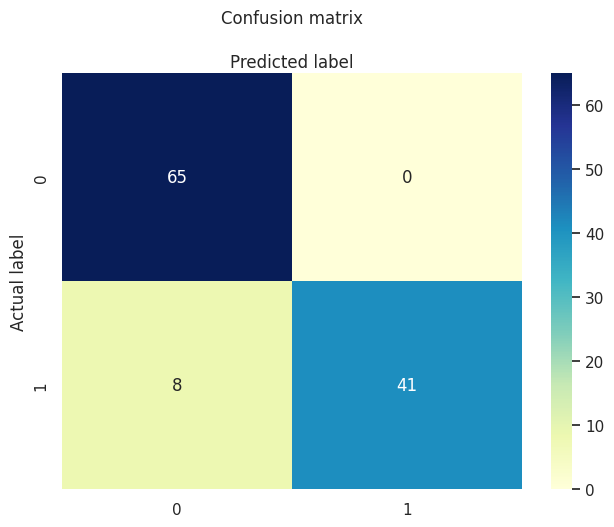

In [39]:

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
#With Penalty
C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(cancer_X_train, cancer_Y_train)
    print('C:', c)
    print('Training accuracy:', clf.score(cancer_X_train, cancer_Y_train))
    print('Test accuracy:', clf.score(cancer_X_train, cancer_Y_train))
    print('')

C: 10
Training accuracy: 0.9934065934065934
Test accuracy: 0.9934065934065934

C: 1
Training accuracy: 0.9692307692307692
Test accuracy: 0.9692307692307692

C: 0.1
Training accuracy: 0.9296703296703297
Test accuracy: 0.9296703296703297

C: 0.001
Training accuracy: 0.6417582417582418
Test accuracy: 0.6417582417582418



In [41]:
#Problem 3
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
cancer_NB_fit = gnb.fit(cancer_X_train, cancer_Y_train)
cancer_NB_Y_pred=cancer_NB_fit.predict(cancer_X_test)

print("Accuracy:",metrics.accuracy_score(cancer_Y_test, cancer_NB_Y_pred))
print("Precision:",metrics.precision_score(cancer_Y_test, cancer_NB_Y_pred))
print("Recall:",metrics.recall_score(cancer_Y_test, cancer_NB_Y_pred))
print("F1 Score:",metrics.f1_score(cancer_Y_test, cancer_NB_Y_pred))

Accuracy: 0.9210526315789473
Precision: 0.9347826086956522
Recall: 0.8775510204081632
F1 Score: 0.9052631578947369


In [42]:
#Problem 4
#Preprocessing
file_path = '/content/drive/My Drive/ML_data/cancer.csv'
cancer_dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'B': 0, 'M': 1})

cancer_dataset[varlist] = cancer_dataset[varlist].apply(binary_map)

np.random.seed(17)
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X,cancer_Y, train_size = 0.8, test_size = 0.2, random_state = 100)



In [43]:
#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
cancer_X_train = scalerMM.fit_transform(cancer_X_train)
cancer_X_test = scalerMM.fit_transform(cancer_X_test)
# df_train = scalerSS.fit_transform(df_train)
# df_test = scalerSS.fit_transform(df_test)



cancer_X = cancer_dataset.loc[:, ~cancer_dataset.columns.isin(['id', 'diagnosis','Unnamed: 32'])]
cancer_Y = cancer_dataset['diagnosis'].values

In [44]:
PCA_log_results=pd.DataFrame(columns=['K','Accuracy','Precision','Recall','F1'])

from sklearn.decomposition import PCA

K=20
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(cancer_X_train)
    principalComponents_test = pca.fit_transform(cancer_X_test)

    classifier = LogisticRegression(random_state=0)
    classifier.fit(principalComponents, cancer_Y_train)
    cancer_Y_pred = classifier.predict(principalComponents_test)

    accuracy = metrics.accuracy_score(cancer_Y_test, cancer_Y_pred)
    precision = metrics.precision_score(cancer_Y_test, cancer_Y_pred)
    recall = metrics.recall_score(cancer_Y_test, cancer_Y_pred)
    f1 = metrics.f1_score(cancer_Y_test, cancer_Y_pred)

    cancer_data= {'K':i,'Accuracy':accuracy,'Precision':precision,'Recall': recall,'F1': f1}
    PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)

<ipython-input-44-ab684262d623>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-44-ab684262d623>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-44-ab684262d623>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-44-ab684262d623>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-44-ab684262d6

([<matplotlib.axis.XTick at 0x7f00c7a65720>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

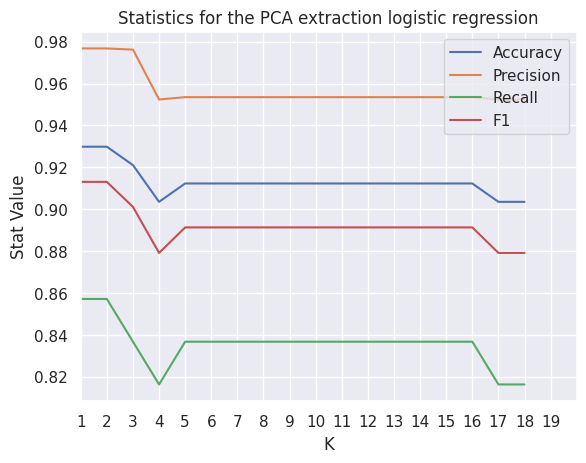

In [45]:
#Plot stats for PCA/Logistic
fig1, ax = plt.subplots()
ax.plot(PCA_log_results['Accuracy'])
ax.plot(PCA_log_results['Precision'])
ax.plot(PCA_log_results['Recall'])
ax.plot(PCA_log_results['F1'])
ax.legend(['Accuracy','Precision','Recall','F1'])
ax.set_title('Statistics for the PCA extraction logistic regression')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
plt.xlim(1,K)
plt.xticks(arange)

In [46]:
#Problem 5 - cancer data with the Bayes/PCA regression

#Preprocessing
file_path = '/content/drive/My Drive/ML_data/cancer.csv'
cancer_dataset = pd.read_csv(file_path)

#Mapping text to number
varlist =  ['diagnosis']
def binary_map(x):
    return x.map({'B': 0, 'M': 1})

cancer_dataset[varlist] = cancer_dataset[varlist].apply(binary_map)

np.random.seed(17)
cancer_X_train, cancer_X_test, cancer_Y_train, cancer_Y_test = train_test_split(cancer_X,cancer_Y, train_size = 0.8, test_size = 0.2, random_state = 100)



In [47]:
#Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()


#Min Max or Standard normalize
cancer_X_train = scalerMM.fit_transform(cancer_X_train)
cancer_X_test = scalerMM.fit_transform(cancer_X_test)
# df_train = scalerSS.fit_transform(df_train)
# df_test = scalerSS.fit_transform(df_test)


cancer_X = cancer_dataset.loc[:, ~cancer_dataset.columns.isin(['id', 'diagnosis','Unnamed: 32'])]
cancer_Y = cancer_dataset['diagnosis'].values

In [48]:

PCA_log_results=pd.DataFrame(columns=['K','Accuracy','Precision','Recall','F1'])

from sklearn.decomposition import PCA

K=20
arange=np.arange(1,K)
for i in arange:
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(cancer_X_train)
    principalComponents_test = pca.fit_transform(cancer_X_test)

    cancer_NB_fit = gnb.fit(principalComponents, cancer_Y_train)
    cancer_NB_Y_pred=cancer_NB_fit.predict(principalComponents_test)


    accuracy = metrics.accuracy_score(cancer_Y_test, cancer_Y_pred)
    precision = metrics.precision_score(cancer_Y_test, cancer_Y_pred)
    recall = metrics.recall_score(cancer_Y_test, cancer_Y_pred)
    f1 = metrics.f1_score(cancer_Y_test, cancer_Y_pred)

    cancer_data= {'K':i,'Accuracy':accuracy,'Precision':precision,'Recall': recall,'F1': f1}
    PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)

<ipython-input-48-c9b81d6e226c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-48-c9b81d6e226c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-48-c9b81d6e226c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-48-c9b81d6e226c>:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(cancer_data,ignore_index=True)
<ipython-input-48-c9b81d6e22

([<matplotlib.axis.XTick at 0x7f00c577e350>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

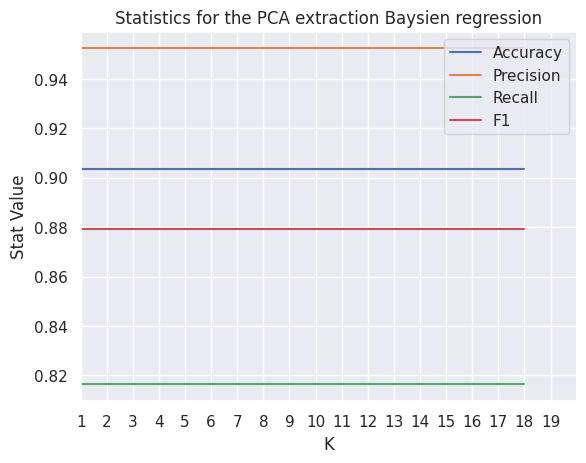

In [49]:
#Plot stats for PCA/Logistic
fig1, ax = plt.subplots()
ax.plot(PCA_log_results['Accuracy'])
ax.plot(PCA_log_results['Precision'])
ax.plot(PCA_log_results['Recall'])
ax.plot(PCA_log_results['F1'])
ax.legend(['Accuracy','Precision','Recall','F1'])
ax.set_title('Statistics for the PCA extraction Baysien regression')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
plt.xlim(1,K)
plt.xticks(arange)
